In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 【問題1】1次関数
$x$ が-50から50の範囲で次の式を考えます。

$
y=12x+1
$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [3]:
x = np.arange(-50, 50.1, 0.1)
y = 0.5 * x + 1

## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。

0列目にx、1列目にyが来るようにします。

In [4]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

xy = np.concatenate((x, y), axis=1)

## 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

<img src="https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png">

各変化量は以下の図のように隣同士の要素の差から近似的に求めます。

<img src="https://t.gyazo.com/teams/diveintocode/398d8c5b4b1bd4151dea6488059226a1.png">

《注意》

厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

In [5]:
dx = xy[1:, 0] - xy[:-1, 0]
dy = xy[1:, 1] - xy[:-1, 1]

grad = dy / dx

## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。


<a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html">matplotlib.pyplot.plot — Matplotlib 3.1.0 documentation</a>

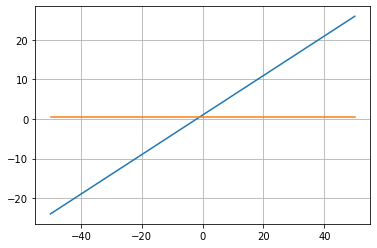

In [6]:
# 一次関数のグラフ
plt.plot(x, y)

# 横軸をx、縦軸を勾配としたグラフも描いてください。
plt.plot(x[1:], grad)
plt.grid()
plt.show()

## 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。


そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$
y=x^2(−50≤x≤50) \\
y=2x^2+2^x(−50≤x≤50) \\
y=sin(x^{1/2})(0≤x≤50) \\
$

また、問題4と同様にグラフを描いてください。

ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。


In [7]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
      変化量を使い勾配を計算する。

      Parameters
      ----------------
      function : function
        求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
      x_range : tuple
        np.arange()の引数と同じ方法で範囲を指定する。

      Returns
      ----------------
      array_xy : ndarray, shape(n, 2)
        xとyを結合したもの。nはx_rangeに依存する。
      gradient : ndarray, shape(n-1,)
        関数の勾配。差をとるため要素は1つ減る
     """
    x = np.arange(x_range[0], x_range[1], x_range[2]).reshape(-1, 1)
    y = function(x).reshape(-1, 1)

    array_xy = np.concatenate((x, y), axis=1)

    dx = array_xy[1:, 0] - array_xy[:-1, 0]
    dy = array_xy[1:, 1] - array_xy[:-1, 1]

    gradient = dy / dx

    return array_xy, gradient

In [8]:
# y = x^2 の関数
def f1(x):
    return x ** 2

# y = 2x^2 + 2^x の関数
def f2(x):
    return 2 * x ** 2 + 2**x

# y = sin(x1/2) の関数
def f3(x):
    return np.sin(x ** 0.5)

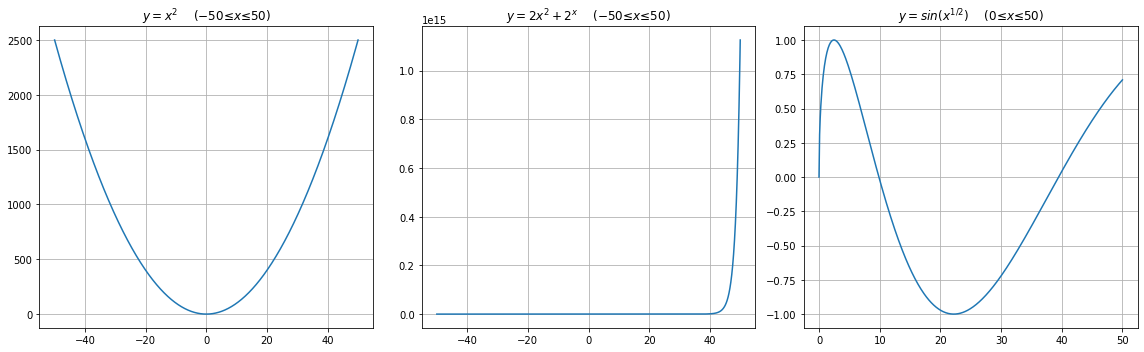

In [43]:
#各関数のX軸Y軸の座標および勾配を変数にセット
f1_xy, f1_grad = compute_gradient(f1)
f2_xy, f2_grad = compute_gradient(f2)
f3_xy, f3_grad = compute_gradient(f3, (0, 50.1, 0.1))

#実際の関数の形を可視化
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(f1_xy[:, 0], f1_xy[:, 1])
ax1.set_title("$y=x^2~~~~(−50≤x≤50)$")
ax1.grid()

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(f2_xy[:, 0], f2_xy[:, 1])
ax2.set_title("$y=2x^2+2^x~~~~(−50≤x≤50)$")
ax2.grid()

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(f3_xy[:, 0], f3_xy[:, 1])
ax3.set_title("$y=sin(x^{1/2})~~~~(0≤x≤50)$")
ax3.grid()

plt.tight_layout()
plt.show()

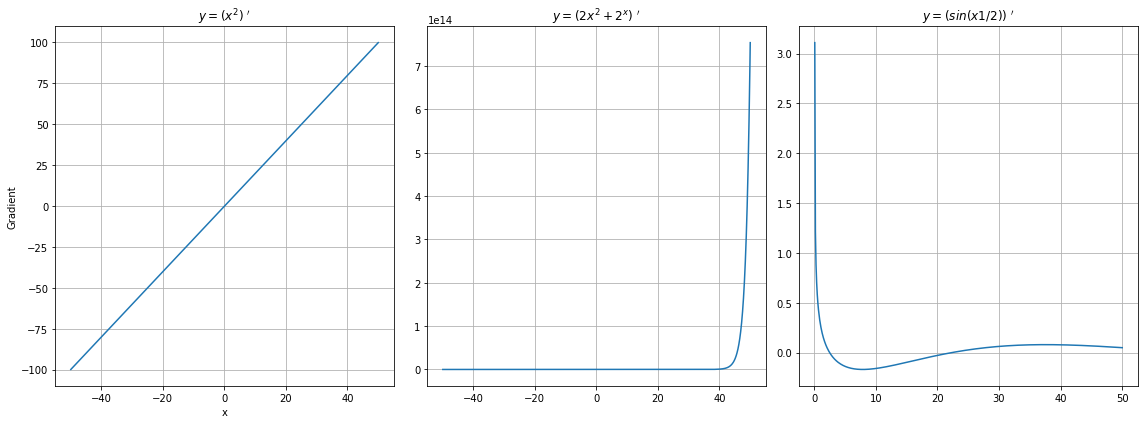

In [59]:
#勾配の関数の形を可視化

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))

ax1.plot(f1_xy[1:, 0], f1_grad)
ax1.set_title("$y=(x^2)~'$")
ax1.grid()

ax2.plot(f2_xy[1:, 0], f2_grad)
ax2.set_title("$y=(2x^2+2^x)~'$")
ax2.grid()

ax3.plot(f3_xy[1:, 0], f3_grad)
ax3.set_title("$y =(sin(x1/2))~'$")
ax3.grid()

ax1.set_xlabel("x")
ax1.set_ylabel("Gradient")
plt.tight_layout()
plt.show()

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。

minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。

In [61]:
f1_min_val = np.min(f1_xy[:, 1])
f1_min_idx = np.argmin(f1_xy[:, 1])
print("f1の最小値：{:.2f}".format(f1_min_val))
print("f1の最小値の前後の勾配： 前：{:.2f}　後：{:.2f}".format(f1_grad[f1_min_idx-1], f1_grad[f1_min_idx+1]))

print()
f2_min_val = np.min(f2_xy[:, 1])
f2_min_idx = np.argmin(f2_xy[:, 1])
print("f2の最小値：{:.2f}".format(f1_min_val))
print("f2の最小値の前後の勾配： 前：{:.2f}　後：{:.2f}".format(f1_grad[f2_min_idx-1], f1_grad[f2_min_idx+1]))

print()
f3_min_val = np.min(f3_xy[:, 1])
f3_min_idx = np.argmin(f3_xy[:, 1])
print("f3の最小値：{:.2f}".format(f1_min_val))
print("f3の最小値の前後の勾配： 前：{:.2f}　後：{:.2f}".format(f1_grad[f3_min_idx-1], f1_grad[f3_min_idx+1]))


f1の最小値：0.00
f1の最小値の前後の勾配： 前：-0.10　後：0.30

f2の最小値：0.00
f2の最小値の前後の勾配： 前：-0.50　後：-0.10

f3の最小値：0.00
f3の最小値の前後の勾配： 前：-55.50　後：-55.30
